In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Sklearn
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
aids_country= pd.read_csv('Data/vih/homosexual aids.csv')
aids_country
aids_country.rename(columns={'Cumulative total**': 'total'}, inplace=True)
aids_country

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Austria,34.0,37.0,28.0,31.0,32.0,32.0,27.0,22.0,25.0,19.0,1018.0,NaN,NaN,NaN
1,Belgium,25.0,25.0,22.0,34.0,31.0,29.0,22.0,20.0,NaN,NaN,1412.0,NaN,NaN,NaN
2,Bulgaria,4.0,4.0,4.0,4.0,5.0,2.0,8.0,12.0,9.0,12.0,88.0,NaN,NaN,NaN
3,Croatia,11.0,6.0,12.0,17.0,19.0,18.0,22.0,11.0,18.0,12.0,249.0,NaN,NaN,NaN
4,Cyprus,2.0,4.0,4.0,4.0,4.0,0.0,1.0,2.0,4.0,2.0,109.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Uzbekistan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
57,West,1911.0,1889.0,1826.0,1765.0,1769.0,1614.0,1553.0,1416.0,1209.0,999.0,104412.0,NaN,NaN,NaN
58,Centre,88.0,91.0,125.0,138.0,147.0,156.0,171.0,186.0,211.0,177.0,2975.0,NaN,NaN,NaN
59,East,16.0,24.0,32.0,24.0,40.0,62.0,69.0,97.0,102.0,113.0,744.0,NaN,NaN,NaN


In [64]:
aids_country_homosexual= pd.read_csv('Data/vih/AIDS_diagnoses_men_infected_by_sex_between_men_by_country_and_year_of_diagnosis_2006 to 2015.csv')
aids_country_homosexual.rename(columns={'Cumulative total**': 'total'}, inplace=True)
aids_country_homosexual

,Area,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,West,Austria,34.0,37.0,28.0,31.0,32.0,32.0,27.0,22.0,25.0,19.0,1018.0,NaN,NaN,NaN
1,West,Belgium,25.0,25.0,22.0,34.0,31.0,29.0,22.0,20.0,NaN,NaN,1412.0,NaN,NaN,NaN
2,Centre,Bulgaria,4.0,4.0,4.0,4.0,5.0,2.0,8.0,12.0,9.0,12.0,88.0,NaN,NaN,NaN
3,Centre,Croatia,11.0,6.0,12.0,17.0,19.0,18.0,22.0,11.0,18.0,12.0,249.0,NaN,NaN,NaN
4,Centre,Cyprus,2.0,4.0,4.0,4.0,4.0,0.0,1.0,2.0,4.0,2.0,109.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,West,West,1911.0,1889.0,1826.0,1765.0,1769.0,1614.0,1553.0,1416.0,1209.0,999.0,104412.0,NaN,NaN,NaN
61,Centre,Centre,88.0,91.0,125.0,138.0,147.0,156.0,171.0,186.0,211.0,177.0,2975.0,NaN,NaN,NaN
62,East,East,16.0,24.0,32.0,24.0,40.0,62.0,69.0,97.0,102.0,113.0,744.0,NaN,NaN,NaN
63,NaN,total WHO European Region,2015.0,2004.0,1983.0,1927.0,1956.0,1832.0,1793.0,1699.0,1522.0,1289.0,108131.0,NaN,NaN,NaN


In [50]:
aids_country_heterosexual= pd.read_csv('Data/vih/AIDS_diagnoses_heterosexual_contact_by country_and_year_of_diagnosis_2006 to 2015.csv')
aids_country_heterosexual

,Area,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total**,Unnamed: 13
0,West,Austria,39.0,41.0,35.0,37.0,30.0,27.0,34.0,24.0,33.0,25.0,856.0,NaN
1,West,Belgium,63.0,66.0,75.0,73.0,64.0,49.0,65.0,43.0,NaN,NaN,2303.0,NaN
2,Centre,Bulgaria,12.0,16.0,15.0,19.0,14.0,20.0,15.0,20.0,25.0,22.0,304.0,NaN
3,Centre,Croatia,8.0,4.0,10.0,4.0,1.0,6.0,4.0,6.0,5.0,2.0,153.0,NaN
4,Centre,Cyprus,6.0,6.0,7.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,128.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,WHO European Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,West,West,3494.0,3248.0,3268.0,2878.0,2838.0,2465.0,2451.0,2066.0,1770.0,1428.0,87962.0,NaN
60,Centre,Centre,245.0,255.0,298.0,263.0,269.0,363.0,318.0,347.0,390.0,378.0,5647.0,NaN
61,East,East,1377.0,1710.0,1825.0,2227.0,3113.0,5057.0,5931.0,5921.0,6934.0,6532.0,42696.0,NaN


In [51]:
aids_test= pd.read_csv('Data/vih/number_of_HIV_tests_performed_by_country_and_year_2006 to 2015.csv')
aids_test

,Area,Country*,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Tests/1000 population,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,West,Austria,659693.0,777935.0,751749.0,770901.0,831675.0,826256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West,Belgium,578717.0,595394.0,619418.0,635150.0,651095.0,679655.0,703486.0,695433.0,697684.0,692679.0,61.5,NaN,NaN,NaN
2,Centre,Bulgaria,105000.0,160000.0,110000.0,140000.0,160000.0,180000.0,190000.0,210000.0,230000.0,290000.0,40.3,NaN,NaN,NaN
3,Centre,Croatia,26124.0,32698.0,38996.0,40938.0,32848.0,32928.0,40071.0,29998.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Centre,Cyprus,37763.0,41913.0,42294.0,48158.0,48385.0,49074.0,54120.0,50235.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Centre,Czech Republic,317823.0,344874.0,342223.0,347135.0,353507.0,334569.0,349205.0,341583.0,349448.0,345274.0,32.8,NaN,NaN,NaN
6,West,Denmark,154332.0,141880.0,124935.0,112533.0,168923.0,137877.0,134709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,East,Estonia,65861.0,68478.0,74357.0,78735.0,78054.0,85025.0,73367.0,82279.0,82266.0,87587.0,66.7,NaN,NaN,NaN
8,West,Finland,147601.0,153478.0,186822.0,190380.0,185114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,West,France,5176147.0,5152287.0,5051896.0,5023831.0,5009124.0,5212211.0,5242116.0,5218847.0,5255258.0,5354396.0,80.6,NaN,NaN,NaN


In [52]:
aids_test= pd.read_csv('Data/vih/HIV_AIDS_deaths_by_geographic_area_country_and_year_of_death_2006 to 2015.csv')
aids_test

,Area,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total***,Unnamed: 13
0,EU/EEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West,Austria,38.0,51.0,32.0,33.0,40.0,39.0,35.0,41.0,44.0,25.0,1511.0,NaN
2,West,Belgium,39.0,69.0,56.0,52.0,56.0,69.0,65.0,80.0,67.0,60.0,2032.0,NaN
3,Centre,Bulgaria,8.0,6.0,9.0,2.0,14.0,17.0,16.0,14.0,13.0,8.0,164.0,NaN
4,Centre,Croatia,6.0,2.0,7.0,7.0,10.0,6.0,9.0,8.0,5.0,16.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,WHO European Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,West,West,3271.0,3211.0,2790.0,2371.0,2208.0,2001.0,1819.0,1853.0,973.0,662.0,186951.0,NaN
62,Centre,Centre,310.0,285.0,290.0,244.0,288.0,391.0,339.0,344.0,375.0,324.0,8354.0,NaN
63,East,East,2894.0,3085.0,3492.0,3244.0,3847.0,4548.0,4593.0,4178.0,4070.0,3665.0,43507.0,NaN


In [96]:
aids_mother_to_child= pd.read_csv('Data/vih/AIDS_diagnoses_mother_to_child_transmission_by_country_year_of_diagnosis_2006 to 2015.csv')
aids_mother_to_child

,Area,Country*,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total**,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,West,Austria,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,13,NaN,NaN,NaN
1,West,Belgium,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,122,NaN,NaN,NaN
2,Centre,Bulgaria,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,7,NaN,NaN,NaN
3,Centre,Croatia,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN
4,Centre,Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,total Non EU-EEA,146.0,150.0,116.0,131.0,176.0,155.0,115.0,102.0,92.0,83.0,1712,NaN,NaN,NaN
57,West,West,62.0,66.0,65.0,57.0,38.0,31.0,29.0,37.0,13.0,9.0,3936,NaN,NaN,NaN
58,Centre,Centre,12.0,10.0,14.0,24.0,13.0,17.0,18.0,25.0,10.0,12.0,453,NaN,NaN,NaN
59,East,East,145.0,145.0,118.0,127.0,171.0,155.0,109.0,97.0,91.0,79.0,1525,NaN,NaN,NaN


In [97]:
aids_drug_injection= pd.read_csv('Data/vih/AIDS_diagnoses_injecting_drug_use_by_country_and_year_of_diagnosis_2006 to 2015.csv')
aids_drug_injection

,Area,Country*,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cumulative total**,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,EU/EEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West,Austria,20.0,23.0,30.0,18.0,14.0,13.0,25.0,14.0,18.0,18.0,867.0,NaN,NaN,NaN,NaN,NaN,NaN
2,West,Belgium,7.0,3.0,8.0,5.0,3.0,4.0,1.0,2.0,NaN,NaN,282.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Centre,Bulgaria,0.0,1.0,4.0,7.0,10.0,17.0,39.0,29.0,26.0,11.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Centre,Croatia,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,*Country-specific comments are in Annex 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,** Cumulative total is the total number of cas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,"*** Without prejudice to positions on status, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Source: European Centre for Disease Prevention...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
aids_country_homosexual_2006 = aids_country_homosexual['2006'].dropna()
aids_country_homosexual_2006

0       34.0
1       25.0
2        4.0
3       11.0
4        2.0
       ...  
58      90.0
60    1911.0
61      88.0
62      16.0
63    2015.0
Name: 2006, Length: 61, dtype: float64

In [54]:
aids_country_homosexual_2007 = aids_country_homosexual['2007'].dropna()
aids_country_homosexual_2007

0       37.0
1       25.0
2        4.0
3        6.0
4        4.0
       ...  
58     112.0
60    1889.0
61      91.0
62      24.0
63    2004.0
Name: 2007, Length: 61, dtype: float64

In [55]:
aids_country_homosexual_2008 = aids_country_homosexual['2008'].dropna()
aids_country_homosexual_2008

0       28.0
1       22.0
2        4.0
3       12.0
4        4.0
5        7.0
6       16.0
7        1.0
8       10.0
9      258.0
10     273.0
11      57.0
12      16.0
13       1.0
14       8.0
15     299.0
16       3.0
17       0.0
18       7.0
19       0.0
20       1.0
21     132.0
22       6.0
23      28.0
24     107.0
25       9.0
26       0.0
27       7.0
28     324.0
30     229.0
31    1869.0
33       6.0
34       1.0
35       3.0
36       1.0
37       0.0
38       0.0
39       2.0
40       7.0
41       5.0
42       0.0
43       0.0
44       0.0
45       0.0
46       2.0
48       0.0
49      17.0
50      15.0
51       2.0
52      49.0
53       0.0
54      11.0
55       0.0
56      10.0
57       0.0
58     114.0
60    1826.0
61     125.0
62      32.0
63    1983.0
Name: 2008, dtype: float64

In [56]:
aids_country_homosexual_2009 = aids_country_homosexual['2009'].dropna()
aids_country_homosexual_2009

0       31.0
1       34.0
2        4.0
3       17.0
4        4.0
5       10.0
6       12.0
7        0.0
8        6.0
9      264.0
10     280.0
11      49.0
12      13.0
13       0.0
14      10.0
15     293.0
16       7.0
17       0.0
18       1.0
19       1.0
20       0.0
21     136.0
22       7.0
23      25.0
24      83.0
25      15.0
26       1.0
27      10.0
28     315.0
30     191.0
31    1819.0
33       6.0
34       0.0
35       0.0
36       1.0
37       0.0
38       0.0
39       1.0
40       3.0
41       8.0
42       0.0
43       0.0
44       2.0
45       0.0
46       4.0
48       0.0
49      26.0
50      25.0
51       1.0
52      45.0
53       0.0
54       2.0
55       0.0
56      10.0
57       0.0
58     108.0
60    1765.0
61     138.0
62      24.0
63    1927.0
Name: 2009, dtype: float64

In [57]:
aids_country_homosexual_2010 = aids_country_homosexual['2010'].dropna()
aids_country_homosexual_2010

0       32.0
1       31.0
2        5.0
3       19.0
4        4.0
5        9.0
6       15.0
7        0.0
8        7.0
9      251.0
10     253.0
11      63.0
12      23.0
13       0.0
14      13.0
15     252.0
16      10.0
17       0.0
18       0.0
19       2.0
20       0.0
21     129.0
22       9.0
23      29.0
24      84.0
25      13.0
26       1.0
27       7.0
28     358.0
30     202.0
31    1822.0
33       1.0
34       0.0
35       1.0
36       4.0
37       2.0
38       5.0
39       1.0
40      10.0
41       6.0
42       1.0
43       0.0
44       2.0
45       0.0
46       5.0
48       0.0
49      22.0
50      22.0
51       0.0
52      61.0
53       0.0
54       3.0
55       0.0
56      10.0
57       0.0
58     134.0
60    1769.0
61     147.0
62      40.0
63    1956.0
Name: 2010, dtype: float64

In [58]:
aids_country_homosexual_2011 = aids_country_homosexual['2011'].dropna()
aids_country_homosexual_2011

0       32.0
1       29.0
2        2.0
3       18.0
4        0.0
5       13.0
6       13.0
7        0.0
8        6.0
9      238.0
10     216.0
11      54.0
12      24.0
13       0.0
14      17.0
15     265.0
16       7.0
17       0.0
18       1.0
19       6.0
20       1.0
21     116.0
22       9.0
23      42.0
24      88.0
25      13.0
26       3.0
27       7.0
28     333.0
30     146.0
31    1699.0
33       5.0
34       1.0
35       2.0
36       1.0
37       6.0
38       2.0
39       4.0
40      11.0
41       8.0
42       1.0
43       0.0
44       2.0
45       0.0
46       1.0
48       1.0
49      22.0
50      21.0
51       1.0
52      35.0
53       0.0
54       0.0
55       0.0
56      31.0
58     133.0
60    1614.0
61     156.0
62      62.0
63    1832.0
Name: 2011, dtype: float64

In [59]:
aids_country_homosexual_2012 = aids_country_homosexual['2012'].dropna()
aids_country_homosexual_2012

0       27.0
1       22.0
2        8.0
3       22.0
4        1.0
5       12.0
6       13.0
7        1.0
8        2.0
9      193.0
10     215.0
11      50.0
12      37.0
13       0.0
14      15.0
15     261.0
16       4.0
17       0.0
18       2.0
19       3.0
20       0.0
21     124.0
22      10.0
23      25.0
24      87.0
25       7.0
26       3.0
27       8.0
28     334.0
30     158.0
31    1644.0
33       6.0
34       0.0
35       2.0
36       1.0
37       3.0
38       4.0
39       3.0
40      11.0
41       4.0
42       0.0
43       0.0
44       0.0
45       0.0
46       4.0
48       2.0
49      31.0
50      30.0
51       1.0
52      33.0
53       0.0
54       0.0
55       0.0
56      45.0
58     149.0
60    1553.0
61     171.0
62      69.0
63    1793.0
Name: 2012, dtype: float64

In [60]:
aids_country_homosexual_2013 = aids_country_homosexual['2013'].dropna()
aids_country_homosexual_2013

0       22.0
1       20.0
2       12.0
3       11.0
4        2.0
5       14.0
6       11.0
7        0.0
8        4.0
9      198.0
10     192.0
11      48.0
12      30.0
13       0.0
14       6.0
15     302.0
16      10.0
17       0.0
18       5.0
19       7.0
20       1.0
21     118.0
22      15.0
23      46.0
24      59.0
25      15.0
26       2.0
27       7.0
28     257.0
30     115.0
31    1529.0
33       6.0
34       1.0
35       5.0
36       3.0
37       3.0
38       3.0
39       3.0
40      16.0
41       8.0
42       4.0
43       0.0
44       0.0
45       0.0
46       3.0
48       0.0
49      20.0
50      19.0
51       1.0
52      32.0
53       1.0
54      12.0
56      50.0
58     170.0
60    1416.0
61     186.0
62      97.0
63    1699.0
Name: 2013, dtype: float64

In [61]:
aids_country_homosexual_2014 = aids_country_homosexual['2014'].dropna()
aids_country_homosexual_2014

0       25.0
2        9.0
3       18.0
4        4.0
5        9.0
6       10.0
7        1.0
8        6.0
9      144.0
10     155.0
11      38.0
12      37.0
13       0.0
14      18.0
15     261.0
16       7.0
17       1.0
18       3.0
19       3.0
20       1.0
21      95.0
22      18.0
23      40.0
24      50.0
25      24.0
26       2.0
27      10.0
28     223.0
30     128.0
31    1340.0
33       8.0
34       1.0
35       7.0
36       1.0
37       4.0
39       5.0
40      21.0
41      11.0
42       0.0
43       0.0
44       2.0
45       1.0
46       3.0
48       0.0
49      27.0
50      27.0
51       0.0
52      21.0
53       1.0
54      15.0
56      55.0
58     183.0
60    1209.0
61     211.0
62     102.0
63    1522.0
Name: 2014, dtype: float64

In [91]:
aids_country_homosexual_2015 = aids_country_homosexual['2015'].dropna()
aids_country_homosexual_2015
aids_country_heterosexual_2006 = aids_country_heterosexual['2006'].dropna()
aids_country_heterosexual_2006
aids_country_heterosexual_2007 = aids_country_heterosexual['2007'].dropna()
aids_country_heterosexual_2007
aids_country_heterosexual_2008 = aids_country_heterosexual['2008'].dropna()
aids_country_heterosexual_2008
aids_country_heterosexual_2009 = aids_country_heterosexual['2009'].dropna()
aids_country_heterosexual_2009
aids_country_heterosexual_2010 = aids_country_heterosexual['2010'].dropna()
aids_country_heterosexual_2010
aids_country_heterosexual_2011 = aids_country_heterosexual['2011'].dropna()
aids_country_heterosexual_2011
aids_country_heterosexual_2012 = aids_country_heterosexual['2012'].dropna()
aids_country_heterosexual_2012
aids_country_heterosexual_2013 = aids_country_heterosexual['2013'].dropna()
aids_country_heterosexual_2013
aids_country_heterosexual_2014 = aids_country_heterosexual['2014'].dropna()
aids_country_heterosexual_2014
aids_country_heterosexual_2015 = aids_country_heterosexual['2015'].dropna()
aids_country_heterosexual_2015

0       25.0
2       22.0
3        2.0
4        4.0
5       14.0
6       27.0
7       15.0
8        5.0
9      214.0
10      44.0
11      28.0
12       7.0
13       0.0
14      13.0
15     383.0
16      58.0
17       0.0
18      15.0
19       3.0
20       1.0
21      64.0
22      17.0
23      22.0
24     146.0
25     196.0
26       3.0
27       0.0
28     171.0
30     235.0
31    1734.0
32      52.0
33       2.0
34     128.0
35      93.0
36     333.0
38       4.0
39     144.0
40      24.0
41      97.0
42      40.0
43     222.0
44       0.0
45       1.0
47       0.0
48      12.0
49      11.0
50       1.0
51      26.0
52     137.0
53      39.0
55    5250.0
57    6604.0
59    1428.0
60     378.0
61    6532.0
62    8338.0
Name: 2015, dtype: float64

In [102]:
aids_country_homosexual_cumulative_total = aids_country_homosexual['total'].dropna()
aids_country_homosexual_cumulative_total
aids_country_heterosexual_cumulative_total = aids_country_heterosexual['Cumulative total**'].dropna()
aids_country_heterosexual_cumulative_total

aids_mother_to_child_cumulative_total = aids_mother_to_child['Cumulative total**'].dropna()
aids_mother_to_child_cumulative_total

aids_drug_injection_total = aids_drug_injection['Cumulative total**'].dropna()
aids_drug_injection_total

1        867.0
2        282.0
3        146.0
4         26.0
5          3.0
        ...   
59     55199.0
61    120247.0
62      2892.0
63     52213.0
64    175352.0
Name: Cumulative total**, Length: 62, dtype: float64

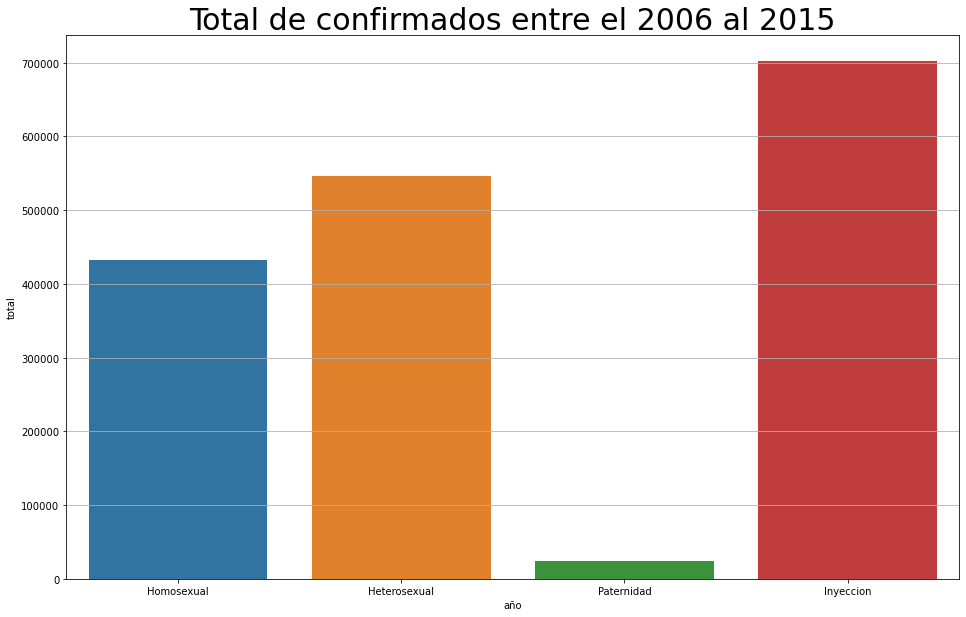

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.DataFrame({'año': 'Homosexual','total': aids_country_homosexual_cumulative_total.sum()}, index=[0])
df2=pd.DataFrame({'año': 'Heterosexual','total': aids_country_heterosexual_cumulative_total.sum()}, index=[0])
df3=pd.DataFrame({'año': 'Paternidad','total': aids_mother_to_child_cumulative_total.sum()}, index=[0])
df4=pd.DataFrame({'año': 'Inyeccion','total': aids_drug_injection_total.sum()}, index=[0])
plt.figure(figsize=(16, 10))
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid(True)
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4])
sns.barplot(x='año',y='total',data=res)
plt.title('Total de confirmados entre el 2006 al 2015', size=30)
plt.show()

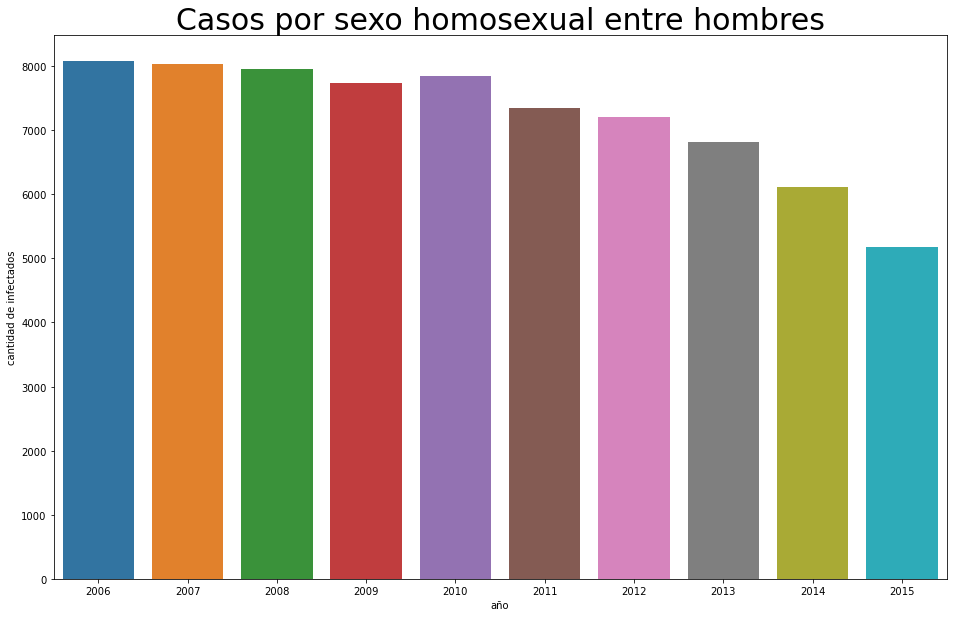

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.title('Casos por sexo homosexual entre hombres', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_country_homosexual_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_country_homosexual_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_country_homosexual_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_country_homosexual_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_country_homosexual_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_country_homosexual_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_country_homosexual_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_country_homosexual_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_country_homosexual_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_country_homosexual_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.show()

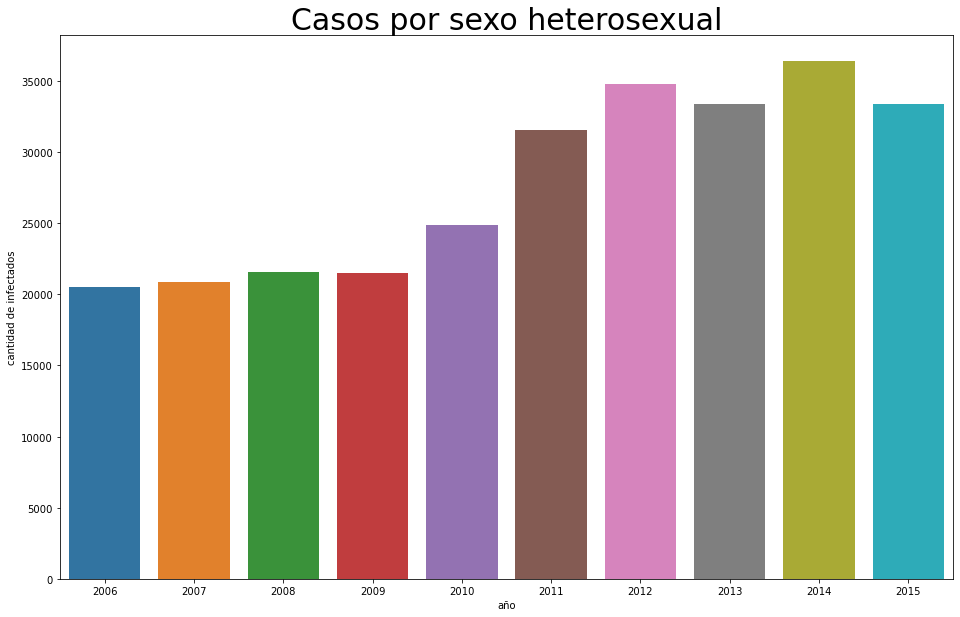

In [127]:
plt.figure(figsize=(16, 10))
plt.title('Casos por sexo heterosexual', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_country_heterosexual_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_country_heterosexual_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_country_heterosexual_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_country_heterosexual_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_country_heterosexual_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_country_heterosexual_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_country_heterosexual_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_country_heterosexual_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_country_heterosexual_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_country_heterosexual_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.show()

In [98]:
aids_drug_injection_2006 = aids_drug_injection['2006'].dropna()
aids_drug_injection_2006
aids_drug_injection_2007 = aids_drug_injection['2007'].dropna()
aids_drug_injection_2007
aids_drug_injection_2008 = aids_drug_injection['2008'].dropna()
aids_drug_injection_2008
aids_drug_injection_2009 = aids_drug_injection['2009'].dropna()
aids_drug_injection_2009
aids_drug_injection_2010 = aids_drug_injection['2010'].dropna()
aids_drug_injection_2010
aids_drug_injection_2011 = aids_drug_injection['2011'].dropna()
aids_drug_injection_2011
aids_drug_injection_2012 = aids_drug_injection['2012'].dropna()
aids_drug_injection_2012
aids_drug_injection_2013 = aids_drug_injection['2013'].dropna()
aids_drug_injection_2013
aids_drug_injection_2014 = aids_drug_injection['2014'].dropna()
aids_drug_injection_2014
aids_drug_injection_2015 = aids_drug_injection['2015'].dropna()
aids_drug_injection_2015

1       18.0
3       11.0
4        1.0
5        0.0
6        3.0
7        0.0
8        4.0
9        0.0
10      20.0
11       8.0
12      28.0
13       2.0
14       0.0
15       0.0
16      81.0
17      51.0
18       0.0
19      15.0
20       1.0
21       0.0
22       4.0
23       0.0
24      28.0
25      33.0
26      93.0
27       0.0
28       0.0
29      68.0
31      10.0
32     479.0
34       0.0
35       0.0
36      22.0
37      90.0
38     139.0
40       0.0
41      99.0
42       7.0
43     150.0
44      73.0
45      22.0
46       0.0
47       0.0
49       0.0
50       5.0
51       5.0
53       2.0
54      62.0
55       0.0
57    3050.0
59    3721.0
61     280.0
62     143.0
63    3777.0
64    4200.0
Name: 2015, dtype: float64

In [99]:
aids_mother_to_child_2006 = aids_mother_to_child['2006'].dropna()
aids_mother_to_child_2006
aids_mother_to_child_2007 = aids_mother_to_child['2007'].dropna()
aids_mother_to_child_2007
aids_mother_to_child_2008 = aids_mother_to_child['2008'].dropna()
aids_mother_to_child_2008
aids_mother_to_child_2009 = aids_mother_to_child['2009'].dropna()
aids_mother_to_child_2009
aids_mother_to_child_2010 = aids_mother_to_child['2010'].dropna()
aids_mother_to_child_2010
aids_mother_to_child_2011 = aids_mother_to_child['2011'].dropna()
aids_mother_to_child_2011
aids_mother_to_child_2012 = aids_mother_to_child['2012'].dropna()
aids_mother_to_child_2012
aids_mother_to_child_2013 = aids_mother_to_child['2013'].dropna()
aids_mother_to_child_2013
aids_mother_to_child_2014 = aids_mother_to_child['2014'].dropna()
aids_mother_to_child_2014
aids_mother_to_child_2015 = aids_mother_to_child['2015'].dropna()
aids_mother_to_child_2015

0       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       2.0
10      0.0
11      0.0
12      1.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      2.0
21      0.0
22      1.0
23      0.0
24      6.0
25      0.0
26      0.0
27      0.0
29      5.0
30     17.0
31      0.0
32      0.0
33      2.0
34      0.0
35     10.0
37      0.0
38      0.0
39      0.0
40      5.0
41      5.0
42      3.0
43      0.0
44      0.0
46      0.0
47      1.0
48      0.0
49      1.0
50      0.0
51      6.0
52      3.0
54     48.0
56     83.0
57      9.0
58     12.0
59     79.0
60    100.0
Name: 2015, dtype: float64

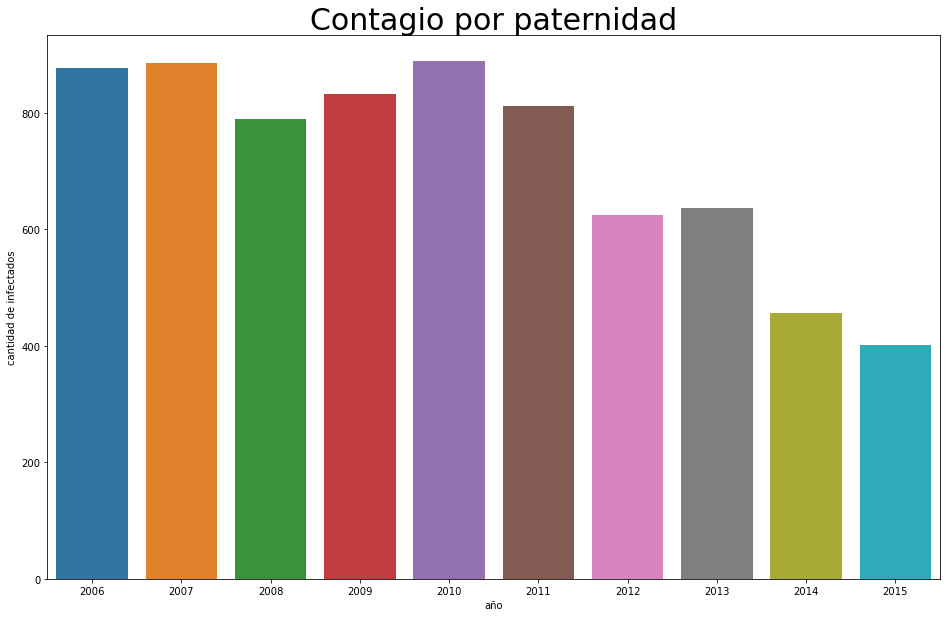

In [128]:
plt.figure(figsize=(16, 10))
plt.title('Contagio por paternidad', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_mother_to_child_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_mother_to_child_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_mother_to_child_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_mother_to_child_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_mother_to_child_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_mother_to_child_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_mother_to_child_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_mother_to_child_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_mother_to_child_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_mother_to_child_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.show()

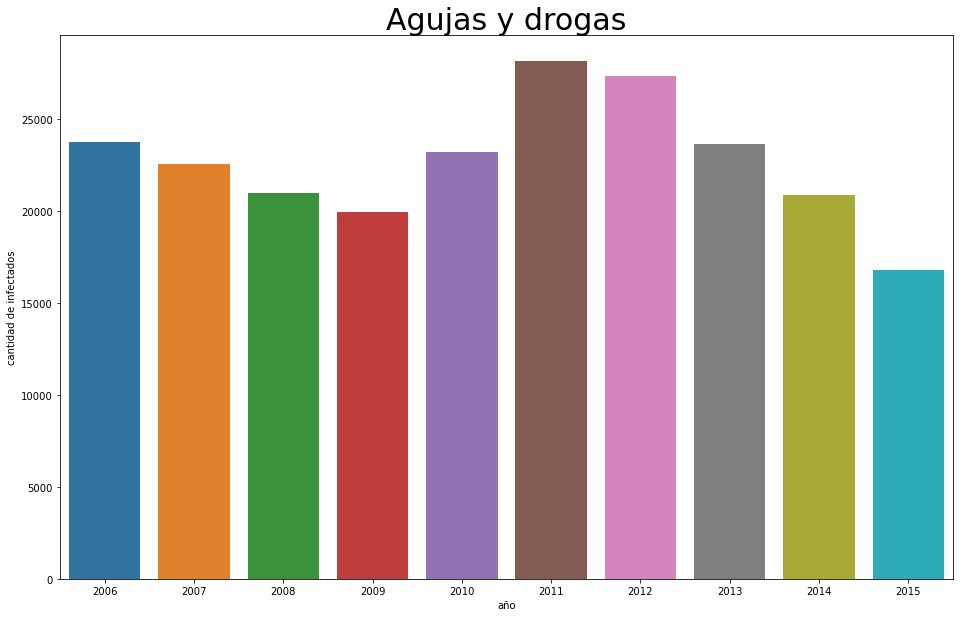

In [129]:
plt.figure(figsize=(16, 10))
plt.title('Agujas y drogas', size=30)
df1=pd.DataFrame({'año': '2006','cantidad de infectados': aids_drug_injection_2006.sum()}, index=[0])
df2=pd.DataFrame({'año': '2007','cantidad de infectados': aids_drug_injection_2007.sum()}, index=[0])
df3=pd.DataFrame({'año': '2008','cantidad de infectados': aids_drug_injection_2008.sum()}, index=[0])
df4=pd.DataFrame({'año': '2009','cantidad de infectados': aids_drug_injection_2009.sum()}, index=[0])
df5=pd.DataFrame({'año': '2010','cantidad de infectados': aids_drug_injection_2010.sum()}, index=[0])
df6=pd.DataFrame({'año': '2011','cantidad de infectados': aids_drug_injection_2011.sum()}, index=[0])
df7=pd.DataFrame({'año': '2012','cantidad de infectados': aids_drug_injection_2012.sum()}, index=[0])
df8=pd.DataFrame({'año': '2013','cantidad de infectados': aids_drug_injection_2013.sum()}, index=[0])
df9=pd.DataFrame({'año': '2014','cantidad de infectados': aids_drug_injection_2014.sum()}, index=[0])
df10=pd.DataFrame({'año': '2015','cantidad de infectados': aids_drug_injection_2015.sum()}, index=[0])
#df1['hue']=1
#df2['hue']=2
res=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10])
sns.barplot(x='año',y='cantidad de infectados',data=res)
plt.show()

In [153]:
aids_country_age= pd.read_csv('Data/vih/new_HIV_diagnoses_by_sex_age_year_of_diagnosis_2006 to 2015.csv')
aids_country_age

,Unnamed: 0,2006 Female,2006 Male,2006 Total**,2007 Female,2007 Male,2007 Total**,2008 Female,2008 Male,2008 Total**,...,2014 Female,2014 Male,2014 Total**,2015 Female,2015 Male,2015 Total**,Cumulative Female,Cumulative Male,Cumulative Unknown,Cumulative Total
0,EU/EEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,<15,168.0,149.0,317.0,172.0,134.0,309.0,143.0,149.0,292.0,...,104.0,89.0,195.0,108.0,97.0,206.0,7611.0,9383.0,80.0,17074.0
2,15-19,354.0,272.0,626.0,330.0,272.0,603.0,295.0,292.0,590.0,...,186.0,316.0,503.0,182.0,266.0,448.0,6398.0,7594.0,35.0,14027.0
3,20-24,900.0,1165.0,2070.0,913.0,1384.0,2306.0,838.0,1418.0,2271.0,...,518.0,1714.0,2235.0,440.0,1651.0,2095.0,17685.0,32984.0,159.0,50828.0
4,25-29,1694.0,2346.0,4054.0,1607.0,2652.0,4288.0,1472.0,2614.0,4103.0,...,881.0,2996.0,3885.0,870.0,2873.0,3752.0,28920.0,59437.0,312.0,88666.0
5,30-39,3031.0,6086.0,9146.0,2866.0,6103.0,9007.0,2808.0,6033.0,8891.0,...,2221.0,5685.0,7924.0,1916.0,5411.0,7343.0,48791.0,125935.0,542.0,175265.0
6,40-49,1341.0,4238.0,5588.0,1404.0,4444.0,5872.0,1488.0,4775.0,6277.0,...,1281.0,4317.0,5609.0,1165.0,3856.0,5029.0,21568.0,77506.0,244.0,99316.0
7,50+,787.0,2219.0,3007.0,757.0,2496.0,3261.0,908.0,2631.0,3540.0,...,1081.0,3297.0,4384.0,894.0,2994.0,3896.0,13732.0,46906.0,107.0,60743.0
8,Unknown,162.0,343.0,535.0,16.0,84.0,138.0,22.0,78.0,152.0,...,4.0,29.0,69.0,5.0,51.0,106.0,2082.0,5559.0,2121.0,9762.0
9,<15,73.0,109.0,382.0,110.0,141.0,481.0,122.0,135.0,488.0,...,146.0,165.0,433.0,191.0,191.0,382.0,1713.0,2161.0,1758.0,5632.0


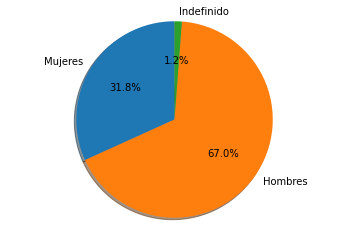

In [157]:
import matplotlib.pyplot as plt

labels = 'Mujeres', 'Hombres', 'Indefinido'
aids_country_age_get = aids_country_age['Cumulative Female'].dropna()
aids_country_age_sum = aids_country_age_get.sum()
aids_country_age2_get = aids_country_age['Cumulative Male'].dropna()
aids_country_age2_sum = aids_country_age2_get.sum()
aids_country_age3_get = aids_country_age['Cumulative Unknown'].dropna()
aids_country_age3_sum = aids_country_age3_get.sum()
sizes = [aids_country_age_sum, aids_country_age2_sum, aids_country_age3_sum ]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()